# Business Network Study: Clustering

I think that it might be useful to get measures of embeddedness of Intermediaries by levels of clustering within the network. Thus, I am using this section to discuss the clustering of particular aspects of the "Does Business With" Network.

In [2]:
#imports

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cPickle as cpkl #for serialization
from IPython.display import display, HTML

#constants

%matplotlib inline
sns.set_style("dark")
sigLev = 3
figWidth = figHeight = 5

#useful functions

def getEdgeInfo(edgeVec,keyName):
    #helper for returning a list of edge information over the whole list of
    #edges
    edgeInfoDict = {"edgeID":[],keyName:[]}
    for edgeTup in edgeVec:
        #0th entry is ID
        edgeInfoDict["edgeID"].append(edgeTup[0])
        #then get key info
        givenEdgeDict = edgeTup[2]
        edgeInfoDict[keyName].append(givenEdgeDict[keyName])
    return edgeInfoDict

def getNodeInfo(nodeVec,keyName):
    #helper for returning a list of node information over the whole list of
    #nodes
    nodeInfoDict = {"nodeID":[],keyName:[]}
    for nodeTup in nodeVec:
        #0th entry is ID
        nodeInfoDict["nodeID"].append(nodeTup[0])
        #then get key info
        givenNodeDict = nodeTup[1]
        nodeInfoDict[keyName].append(givenNodeDict[keyName])
    return nodeInfoDict

def makeDensity(givenFrame,givenCountVar):
    #helper that makes density in the given frame
    givenFrame["density"] = (givenFrame[givenCountVar] / 
                                sum(givenFrame[givenCountVar]))
    return givenFrame

def sortAndRank(givenFrame,givenSortVar,withLog = True):
    #helper that sorts and ranks a given dataframe over a sorting variable
    givenFrame = givenFrame.sort_values(givenSortVar,ascending = False)
    givenFrame["rank"] = range(givenFrame.shape[0])
    if (withLog): #add log rang
        givenFrame["logRank"] = np.log(givenFrame["rank"] + 1)
    return givenFrame

In [3]:
#load in dataset
mainNetwork = nx.read_gpickle("../data/processed/doesBusinessWith.pkl")

# Cluster Analysis

In [4]:
clusterCoeffDict = nx.clustering(mainNetwork)

In [8]:
cpkl.dump(clusterCoeffDict,open("../data/processed/clusterCoeffDict.pkl","wb"))

In [10]:
meanClusteringCoeff = np.mean(clusterCoeffDict.values())

We see that the mean clustering coefficient is {{meanClusteringCoeff}}. This is extremely small, and suggests that this network is not extremely clustered, unlike your typical social network.

In [11]:
#get agent type frame
nodeVec = mainNetwork.nodes(data = True)
agentTypeFrame = pd.DataFrame(getNodeInfo(nodeVec,"entType"))

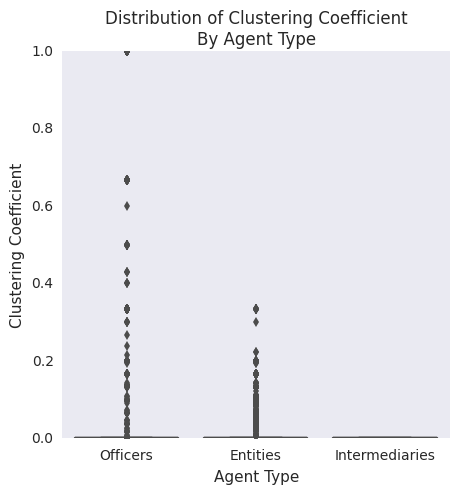

In [24]:
#then get clustering coefficient frame
clusterCoeffFrame = pd.DataFrame({"nodeID" : clusterCoeffDict.keys(),
                                  "cc" : clusterCoeffDict.values()})
#then merge
clusterCoeffFrame = clusterCoeffFrame.merge(agentTypeFrame,on = "nodeID")
#then plot
givenFig = plt.figure(figsize = (figWidth,figHeight))
sns.boxplot(x = "entType",y = "cc",data = clusterCoeffFrame)
plt.xlabel("Agent Type")
plt.ylabel("Clustering Coefficient")
plt.title("Distribution of Clustering Coefficient\nBy Agent Type")
#for presentation
plt.savefig("figures/figure9.png")
#for report
plt.savefig("../report/figures/figure7.png")

_Figure 1: Distribution of Clustering Coefficients._

Unfortunately, it looks like most of our observations have very small clustering coefficients, in fact, for intermediaries, there is $0$ clustering among each agent. This provides a pretty interesting question: what are the kinds of nodes that intermediaries are attached to?

In [14]:
betweennessCentralityDict = cpkl.load(open("../data/processed/robustBCDict.pkl",
                                           "rb"))

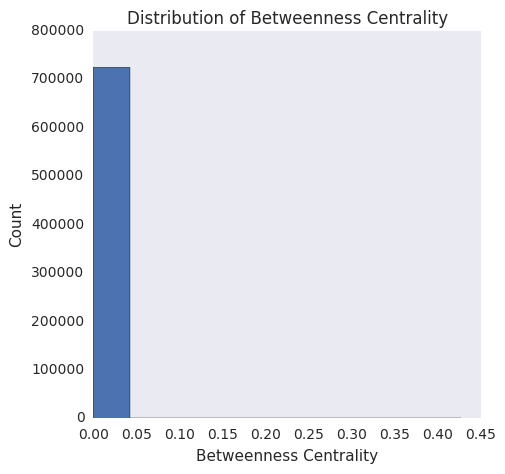

In [15]:
#plot betweenness centrality
givenFig = plt.figure(figsize = (figWidth,figHeight))
plt.hist(betweennessCentralityDict.values())
plt.xlabel("Betweenness Centrality")
plt.ylabel("Count")
plt.title("Distribution of Betweenness Centrality")

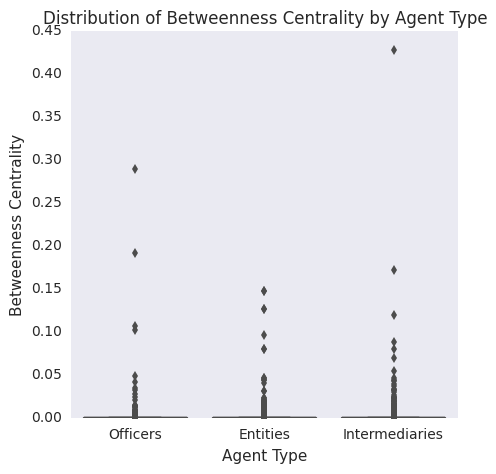

In [26]:
#make betweenness centrality frame
bcFrame = pd.DataFrame({"nodeID" : betweennessCentralityDict.keys(),
                        "bc" : betweennessCentralityDict.values()})
#get agent information
bcFrame = bcFrame.merge(agentTypeFrame,on = "nodeID")
#then plot by agent type
givenFig = plt.figure(figsize = (figWidth,figHeight))
sns.boxplot(x = "entType",y = "bc",data = bcFrame)
plt.xlabel("Agent Type")
plt.ylabel("Betweenness Centrality")
plt.title("Distribution of Betweenness Centrality by Agent Type")
#for presentation
plt.savefig("figures/figure8.png")
#for report
plt.savefig("../report/figures/figure6.png")

In [18]:
intermediaryCCFrame = clusterCoeffFrame[clusterCoeffFrame["entType"] ==
                                        "Intermediaries"]
print intermediaryCCFrame["cc"].sum()

0.0
